## Performance Evaluation of a Buffet Queuing Network

# 1. Team work declaration

## Team
| Student           | ID      |
|-------------------|---------|
| Phan Quang Minh               | 2212074 |
| Bùi Thái An                   | 2252001 |
| Nguyễn Đăng Duy               | 2252116 |
| Phạm Nguyễn Hải Khánh         | 2252333 |
| Nguyễn Thành Tài              | 2252722 |
| Dương Gia Bảo                 | 2252061 |

## Workmap declaration

| Last name | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass1 work description (details in text)  | Rating | week 2 outcome | week 3 outcome | week 4 outcome  |
|-----------|------------|-------------|----------|-----------|-------------|------------------------------------------|-----------------|----------------|----------------|-----------------|
| Minh        | 2212074           | no      | yes  | no    | yes     |    Implement Event processing , integrating component-level testing. Write the overall report and documentation.                                      | A         |    Event interfaces implemented.            |      Core processing logic complete.          |           Final report drafting complete.      |
| An        |    2252001        | yes    | yes  | no    | no      |   Define System Architecture. Implement Server/Queue class, including $M/M/c$ logic and capacity ($K$).                                       | A          |      System specification and Server class interfaces.          |    Server class logic complete.            |         Integration testing with other components.        |
| Duy        |    2252116        | yes     | no   | no    | yes     |      Define the Real-life Problem & System Mapping. Define component interactions.                                   | A          |  Problem definition and system mapping complete.              |            Detailed application design (architecture, class diagrams).    |    Assist with final report & documentation.             |
| Khánh        |  2252333          | no      | no   | yes   | yes     |   Validation Lead. Select and define the two required workloads. Calculate mathematical formula results for comparison. Write Validation/Evaluation section.                                       | A           | Workload definitions and mathematical formulas defined.               |    Mathematical results calculated.            |       Validation and performance evaluation complete.          |
| Tài        |   2252722         | no      | no   | yes   | no      |         Implement Arrival Event generator. Perform Stress Testing .                                 | A          |     Arrival Event interfaces & init logic complete.           |         Arrival Event implementation & basic tests.       |      Stress testing and performance analysis.           |
| Bảo        |    2252061        | no      | no   | yes  | no      |       Implement schedule() and event management logic for inter-queue event traversal/signal management. Perform performance analysis and identify design limitations.                                   | A          |      Schedule/Event management interfaces defined.          |         Event management logic implemented.       |           Partial testing, performance analysis, and limitations section drafted.      |


# 2. System Design: Exploratory Performance Analysis of a Buffet Restaurant

This document outlines the complete system design for a simulation-based performance evaluation of a buffet restaurant. The design follows a formal 7-step process with a specific focus on identifying performance bottlenecks and quantifying customer wait times.

## System Performance Steps

### 1. Define Goal and System

**Goal:**
The primary goal of this project is to **identify the performance bottleneck** within the four-station buffet system under various workloads. A secondary, but equally important, goal is to **quantify the end-to-end average time a customer spends in the system**. The analysis will be used to propose a resource allocation strategy that mitigates identified bottlenecks and ensures an acceptable customer experience.

**System:**
The system under study is a buffet restaurant modeled as an **Open Queuing Network**. It consists of four distinct service nodes (stations), each with its own queue:
* Drink Station
* Salad Bar
* Main Course Station
* Dessert Station

### 2. Service and Outcomes

**Service Model:**
Each of the four stations is formally modeled as an **M/M/c queuing system**, with a First-Come, First-Served (FCFS) discipline.

**Customer Outcomes (Routing Logic):**
A customer's journey is governed by two probabilistic mechanisms:

**1. Initial Station Choice:** A new customer entering the system is routed to their first station according to the probabilities in Table 1.

| First Station | Probability |
| :--- | :---: |
| Main Courses | 40% |
| Salad Bar | 30% |
| Drink Station | 20% |
| Dessert Station | 10% |
*Table 1: Probability Distribution for Initial Station Choice*

**2. Internal Transitions:** After service at any station `i`, a customer's next destination is determined by the transition matrix `P` in Table 2.

| From Station | To: Drink | To: Salad | To: Main | To: Dessert | **Depart** |
| :--- | :---: | :---: | :---: | :---: | :---: |
| **1: Drink** | 0.00 | 0.40 | 0.50 | 0.05 | **0.05** |
| **2: Salad** | 0.10 | 0.00 | 0.70 | 0.05 | **0.15** |
| **3: Main** | 0.15 | 0.05 | 0.00 | 0.50 | **0.30** |
| **4: Dessert** | 0.05 | 0.00 | 0.05 | 0.00 | **0.90** |
*Table 2: Internal Transition Probability Matrix ($P_{ij}$)*

### 3. Select Metrics

**Primary Metrics (Goal-Oriented):**
* **Average Total Time in System (`W`):** Directly quantifies the overall customer experience.
* **Average Waiting Time in Queue (`W_q`):** The key indicator used to identify which station is the bottleneck.

**Secondary Metrics (Diagnostic):**
* **Server Utilization (`ρ`):** Helps explain *why* a station is a bottleneck.
* **Average Queue Length (`L_q`):** Provides insight into physical congestion.

### 4. List System Parameters

This is a comprehensive list of all parameters that could affect system performance, categorized by type.

**System Parameters** (Characteristics of the restaurant design)
| Parameter | Description |
| :--- | :--- |
| **Server Counts (`c_i`)** | The number of servers/staff at each station. |
| **Routing Matrix (`P_ij`)**| The fixed probabilities of moving between stations. |

**Workload Parameters** (Characteristics of customer demand)
| Parameter | Description |
| :--- | :--- |
| **Arrival Rate (`alpha`)** | The rate of new customers entering the restaurant. |
| **Service Times (`t_s_i`)**| The average time a customer needs for service at each station. |
| **Initial Choice (`p_i`)**| The probability distribution for a customer's first station choice. |

### 5. List Factors to Study

From the comprehensive list in Step 4, we select a subset to intentionally vary in our experiment. These proposals, or **factors**, are chosen for their anticipated high impact on performance.

**Factor 1: Workload Intensity (`alpha`)**
* **Description:** This primary workload parameter is varied to test system robustness under different real-world traffic conditions.
* **Levels (customers/minute):** `{2 (Low), 6 (Medium), 10 (High)}`

**Factor 2: Main Course Server Count (`c_main`)**
* **Description:** This system parameter is varied because the Main Course station's long service time and high popularity make it a strong candidate for being a bottleneck.
* **Levels (number of servers):** `{8, 9, 10, 11, 12, 13, 14}`

**Factor 3: Salad Bar Server Count (`c_salad`)**
* **Description:** This system parameter is included to investigate potential secondary bottlenecks and understand if reinforcing one station shifts congestion elsewhere.
* **Levels (number of servers):** `{4, 5, 6}`

**Factor 4: Dessert Bar Server Count (`c_dessert`)**
* **Description:** This system parameter is included to investigate potential third bottlenecks and understand if reinforcing one station shifts congestion elsewhere.
* **Levels (number of servers):** `{3, 4, 5}`

**Factor 5: Drink Bar Server Count (`c_drink`)**
* **Description:** This system parameter is included to investigate potential fourth bottlenecks and understand if reinforcing one station shifts congestion elsewhere.
* **Levels (number of servers):** `{1, 2, 3, 4}`

### 6. Evaluation Technique

**1. Primary Technique: Discrete-Event Simulation (DES)**
* **Selection Rationale:** We selected DES as our primary tool because it can accurately model the complex, stochastic interactions of a queuing network with feedback loops. It allows for detailed measurement of dynamic metrics (like wait times) that are essential for achieving the project's goals.

**2. Secondary Technique: Analytical Modeling**
* **Selection Rationale:** We selected Analytical Modeling (Jackson Network Theory) as a supporting technique for **Validation**. The simulation's output for simple, steady-state averages will be compared against the exact values predicted by queuing theory formulas. A close match will validate that the simulation logic is implemented correctly.

### 7. Select Workload and Experimental Design

This final step defines the specific workload values and outlines the formal plan for the simulation experiments. To satisfy the theoretical requirement of evaluating system performance under different conditions, we define two distinct workload intensities.

#### A. Workload Definition
We classify the workload based on the Customer Arrival Rate ($\alpha$ or $\lambda$).

**1. Variable Workload Scenarios (The Stress Test):**
* **Scenario A: Normal Load ($\alpha = 2$ customers/min)**
    * *Purpose:* To validate the system in a standard "Steady State" where $\rho < 1.0$. This represents typical restaurant operations.
* **Scenario B: Heavy Load / Stress Test ($\alpha = 10$ customers/min)**
    * *Purpose:* To push the system toward its theoretical limit ($\rho \to 1.0$). This allows us to observe non-linear queue growth and identify which station breaks first (the Bottleneck).

**2. Constant System Parameters:**
The following parameters remain fixed across all experiments:
* **Mean Service Times:**
    * Drink Station: $20s$
    * Salad Bar: $45s$
    * Main Course: $60s$
    * Dessert: $30s$
* **Routing Logic:** As defined by the Transition Matrix $P$ in Step 2.

#### B. Simulation Control Parameters (Theory & Validity)
To ensure the simulation data is statistically valid and comparable to theoretical models, we apply the following controls:

* **Warm-up Period (Transient State Removal):**
    * **Duration:** 120 minutes.
    * *Theoretical Justification:* The system starts empty. We discard the first 2 hours of data to remove the "Transient Bias" and ensure metrics are collected only after the system reaches "Steady State equilibrium."
* **Replications (Statistical Confidence):**
    * **Count:** 10 replications per scenario.
    * *Justification:* Since the simulation is stochastic (random), a single run is unreliable. We calculate the **mean** of 10 independent runs to smooth out variance and ensure statistical confidence.
* **Run Length:**
    * **Duration:** 480 minutes (8 hours) of collected data post-warmup.

#### C. Experimental Plan
A **Full Factorial Design** will be executed. We will permute the Server Capacity levels (defined in Step 5) against the Workload Scenarios defined above.
* *Total Unique Scenarios:* (Workload Levels) $\times$ (Server Combinations).

#### D. Experimental Objectives
The experiment is designed to specifically answer the questions posed in the project goal:

1.  **Identify the Bottleneck:** Under the "Heavy Load" scenario, which station exhibits the highest utilization ($\rho$) and queue length ($L_q$)?
2.  **Quantify Waiting Time:** What is the expected Average Total Time in System ($W$) for a customer? We will verify if this matches Little's Law theoretical predictions.
3.  **Economic Optimization:** Instead of simply adding infinite servers, we will identify the configuration that provides the **Global Minimum Cost**, balancing the operational cost of staff against the "cost" of customer waiting time.


## System Component/Module description

# 3. System Implementation



Install prerequisite library


*   simpy
*   random
*   panda
*   numpy




In [1]:
%pip install simpy
%pip install pandas
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## System Configurations


In [2]:
import simpy
import random
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import math

In [3]:
class SystemConfig:
    STATIONS = ['Drink', 'Salad', 'Main', 'Dessert']

    # --- PHYSICAL PARAMETERS ---
    SERVICE_TIMES_SEC = {'Drink': 20, 'Salad': 45, 'Main': 60, 'Dessert': 30}
    SERVICE_RATES_MU = {k: 60.0/v for k, v in SERVICE_TIMES_SEC.items()}

    # Routing Logic
    P_INITIAL = np.array([0.20, 0.30, 0.40, 0.10])
    P_MATRIX = np.array([
        [0.00, 0.40, 0.50, 0.05],
        [0.10, 0.00, 0.70, 0.05],
        [0.15, 0.05, 0.00, 0.50],
        [0.05, 0.00, 0.05, 0.00]
    ])

    # --- ECONOMIC PARAMETERS ---
    COST_SERVER_PER_HOUR = 15.00
    COST_WAITING_PER_MIN = 0.75

    # --- EXPERIMENTAL DESIGN FACTORS (STRICT CONSTRAINTS) ---
    # Updated to match specific requirements
    FACTOR_LEVELS = {
        'Main': [8, 9, 10, 11, 12, 13, 14],
        'Salad': [4, 5, 6],
        'Dessert': [3, 4, 5],
        'Drink': [1, 2, 3, 4]
    }

    @staticmethod
    def get_status_str(rho):
        if rho >= 1.00: return "Unstable"
        if rho >= 0.85: return "Critical"
        return "Stable"


## Simulation Model


In [4]:
class FoodStation:
    def __init__(self, env, name, capacity, service_time_sec):
        self.env = env
        self.name = name
        self.resource = simpy.Resource(env, capacity=capacity)
        self.mean_service_time_min = service_time_sec / 60.0
        self.wait_times = []
        self.total_busy = 0.0
        self.queue_area = 0.0
        self.last_update = 0.0

    def update_lq(self):
        curr = self.env.now
        self.queue_area += len(self.resource.queue) * (curr - self.last_update)
        self.last_update = curr

    def serve(self, customer_id):
        arr = self.env.now
        self.update_lq()
        with self.resource.request() as req:
            yield req
            self.update_lq()
            self.wait_times.append(self.env.now - arr)
            s_time = random.expovariate(1.0 / self.mean_service_time_min)
            yield self.env.timeout(s_time)
            self.total_busy += s_time

class BuffetSimulation:
    def __init__(self, alpha, capacities):
        self.env = simpy.Environment()
        self.alpha = alpha
        self.stations = {n: FoodStation(self.env, n, capacities[n], SystemConfig.SERVICE_TIMES_SEC[n]) for n in SystemConfig.STATIONS}
        self.customer_times = []

    def customer_process(self, cust_id):
        start = self.env.now
        curr_idx = np.random.choice(range(4), p=SystemConfig.P_INITIAL)
        while True:
            station_name = SystemConfig.STATIONS[curr_idx]
            yield self.env.process(self.stations[station_name].serve(cust_id))
            probs = list(SystemConfig.P_MATRIX[curr_idx])
            probs.append(1.0 - sum(probs))
            next_step = np.random.choice(range(5), p=probs)
            if next_step == 4: break
            curr_idx = next_step
        self.customer_times.append(self.env.now - start)

    def run(self, runtime=480, warmup=120):
        def gen():
            i = 0
            while True:
                yield self.env.timeout(random.expovariate(self.alpha))
                i += 1
                self.env.process(self.customer_process(i))
        self.env.process(gen())
        self.env.run(until=warmup)
        # Reset
        self.customer_times = []
        for s in self.stations.values():
            s.total_busy = 0
            s.wait_times = []
            s.queue_area = 0
            s.last_update = self.env.now
        self.env.run(until=runtime)
        for s in self.stations.values(): s.update_lq()

        actual_time = runtime - warmup
        res = {}
        for n, s in self.stations.items():
            res[n] = {
                'rho': s.total_busy / (s.resource.capacity * actual_time),
                'wq': np.mean(s.wait_times) if s.wait_times else 0,
                'lq': s.queue_area / actual_time
            }
        return res, np.mean(self.customer_times) if self.customer_times else 0


# 4. Present results

## 4.1 Reporting Utilities
Logic for formatted output tables.

In [5]:
def print_header_friend_style():
    print("-" * 185)
    header1 = f"{'Ph':<3} | {'ID':<3} | {'Alp':<3} | {'W_Sys':<6} || "
    header2 = f"{'':<3} | {'':<3} | {'':<3} | {'ACTUAL':<6} || "

    for st in SystemConfig.STATIONS:
        header1 += f"{st.upper():<35} || "
        header2 += f"{'Svr':<3} {'RhoS':<5} {'Wq':<5} {'Lq':<5} {'Status':<8} | | "

    print(header1)
    print(header2)
    print("-" * 185)

def print_row_friend_style(phase, id_val, alpha, w_sys, caps, metrics):
    row = f"{phase:<3} | {id_val:<3} | {alpha:<3} | {w_sys:<6.2f} || "

    for st in SystemConfig.STATIONS:
        m = metrics[st]
        svr = caps[st]
        rho = m['rho']
        wq = m['wq']
        lq = m['lq']
        status = SystemConfig.get_status_str(rho)
        st_fmt = status
        row += f"{svr:<3} {rho:<5.2f} {wq:<5.2f} {lq:<5.2f} {st_fmt:<8} | | "

    print(row)

## 4.2. Phase 0: Baseline & Stress Testing
Before attempting to optimize the system, we must first establish a **Performance Baseline** using the minimal resource configuration (Main=8, Salad=4, Dessert=3, Drink=1).

**Objective:**
1.  **Sanity Check ($\alpha=2$):** Verify that the simulation behaves correctly under low load. We expect minimal queues and high stability. If this fails, the model logic is flawed.
2.  **Failure Demonstration ($\alpha=10$):** Empirically demonstrate that the current minimal design is insufficient for the target stress load. We expect to see **system instability** (infinite queue growth), which mathematically justifies the need for the resource optimization in Phase 1 and 2.

In [6]:
def run_baseline_stress_test():
    print("\n" + "="*100)
    print("PHASE 0: BASELINE SYSTEM BEHAVIOR")
    print("Goal: Demonstrate that the Minimal Configuration works for Low Load but FAILS for Stress Load.")
    print("="*100)

    # 1. Define Minimal Configuration (Lowest values from your Factor Levels)
    # Main=8, Salad=4, Dessert=3, Drink=1
    min_caps = {'Drink': 1, 'Salad': 4, 'Main': 8, 'Dessert': 3}

    print(f"Testing Configuration: {min_caps}")
    print("-" * 100)
    print(f"{'Workload (Alpha)':<20} | {'W_sys (mins)':<15} | {'Status':<15} | {'Observation'}")
    print("-" * 100)

    # 2. Test Low Load (Alpha = 2)
    random.seed(42)
    sim_low = BuffetSimulation(2.0, min_caps)
    _, w_sys_low = sim_low.run(480, 120)

    status_low = "Stable" if w_sys_low < 10 else "Unstable"
    print(f"{'Low (2.0)':<20} | {w_sys_low:<15.2f} | {status_low:<15} | {'✅ Works fine (Cheap)'}")

    # 3. Test Stress Load (Alpha = 10)
    random.seed(42)
    sim_high = BuffetSimulation(10.0, min_caps)
    res_high, w_sys_high = sim_high.run(480, 120)

    # Check max utilization
    max_rho = max([m['rho'] for m in res_high.values()])
    status_high = "CRASHED" if max_rho >= 1.0 else "Stable"

    # Format large numbers for crashed systems
    w_sys_str = f"{w_sys_high:.2f}" if w_sys_high < 1000 else "> 1000.00"

    print(f"{'Stress (10.0)':<20} | {w_sys_str:<15} | {status_high:<15} | {'❌ System Overwhelmed'}")
    print("-" * 100)
    print(">> CONCLUSION: We cannot use the minimal configuration for the new target workload (Alpha=10).")
    print(">> Proceeding to Phase 1 to find the Stability Floor.")

run_baseline_stress_test()


PHASE 0: BASELINE SYSTEM BEHAVIOR
Goal: Demonstrate that the Minimal Configuration works for Low Load but FAILS for Stress Load.
Testing Configuration: {'Drink': 1, 'Salad': 4, 'Main': 8, 'Dessert': 3}
----------------------------------------------------------------------------------------------------
Workload (Alpha)     | W_sys (mins)    | Status          | Observation
----------------------------------------------------------------------------------------------------
Low (2.0)            | 1.96            | Stable          | ✅ Works fine (Cheap)
Stress (10.0)        | 58.36           | CRASHED         | ❌ System Overwhelmed
----------------------------------------------------------------------------------------------------
>> CONCLUSION: We cannot use the minimal configuration for the new target workload (Alpha=10).
>> Proceeding to Phase 1 to find the Stability Floor.


## 4.3 Two-Phase Optimization Logic
We employ a **Divide and Conquer** strategy to efficiently explore the design space:
1.  **Phase 1: Discrete Stability Search** - We start with the lowest resource levels and iteratively increase servers at bottleneck stations to find the "Stability Floor" (minimum configuration required to prevent $\rho \ge 1.0$).
2.  **Phase 2: Constrained Design Sweep** - We perform a detailed factorial simulation only on valid configurations equal to or above the Stability Floor.

In [7]:
def run_phase_1_discrete_stability_search(alpha):
    print("\n" + "="*100)
    print("PHASE 1: DISCRETE STABILITY SEARCH (Constrained Divide & Conquer)")
    print(f"Goal: Find the 'Stability Floor' using ONLY allowed server levels: {SystemConfig.FACTOR_LEVELS}")
    print(f"Control: Running 10 Replications per Iteration to ensure statistical confidence.")
    print("="*100)

    print_header_friend_style()

    # 1. Start with the LOWEST indices for all factors
    current_indices = {k: 0 for k in SystemConfig.STATIONS}

    iteration = 0
    max_iterations = 15
    REPS = 10 # Updated to 10 Replications

    while iteration < max_iterations:
        iteration += 1

        # Construct capacities from indices
        current_caps = {k: SystemConfig.FACTOR_LEVELS[k][idx] for k, idx in current_indices.items()}

        # 2. Run Simulation (Averaging over REPS)
        avg_sys = 0
        avg_metrics = {k: {'rho':0, 'wq':0, 'lq':0} for k in SystemConfig.STATIONS}

        for r in range(REPS):
            random.seed(42 + iteration + (r * 100)) # Ensure unique seed per replication
            sim = BuffetSimulation(alpha, current_caps)
            res, sys_t = sim.run(480, 120)

            avg_sys += sys_t
            for k in res:
                avg_metrics[k]['rho'] += res[k]['rho']
                avg_metrics[k]['wq'] += res[k]['wq']
                avg_metrics[k]['lq'] += res[k]['lq']

        # Averaging
        avg_sys /= REPS
        for k in avg_metrics:
            for m in avg_metrics[k]: avg_metrics[k][m] /= REPS

        # 3. Print Row
        print_row_friend_style("P1", iteration, alpha, avg_sys, current_caps, avg_metrics)

        # 4. Analyze & Adjust
        bottlenecks = []
        max_rho = 0

        for st in SystemConfig.STATIONS:
            rho = avg_metrics[st]['rho']
            max_rho = max(max_rho, rho)

            # Identify Bottlenecks (Using Average Rho)
            if rho > 0.90:
                bottlenecks.append(st)

        if not bottlenecks:
            print("-" * 185)
            print(f">> STABILITY REACHED! Max Avg Utilization = {max_rho:.2%}")
            print(f">> Stability Floor Found: {current_caps}")
            break

        # Strategy: Bump bottlenecks to the NEXT ALLOWED LEVEL
        changes_made = False
        print(f"   [Analysis]: Unstable/Critical {bottlenecks}.")

        for b in bottlenecks:
            curr_idx = current_indices[b]
            max_idx = len(SystemConfig.FACTOR_LEVELS[b]) - 1

            if curr_idx < max_idx:
                current_indices[b] += 1
                new_val = SystemConfig.FACTOR_LEVELS[b][current_indices[b]]
                print(f"    -> Bumping {b}: {SystemConfig.FACTOR_LEVELS[b][curr_idx]} -> {new_val}")
                changes_made = True
            else:
                print(f"    -> WARNING: {b} is already at MAX allowed level ({SystemConfig.FACTOR_LEVELS[b][curr_idx]})!")

        if not changes_made:
            print(">> STOPPING: Cannot increase capacity further within design constraints.")
            break

    return current_caps


def run_phase_2_constrained_sweep(alpha, floor_caps):
    print("\n" + "="*100)
    print("PHASE 2: CONSTRAINED DESIGN SWEEP")
    print("Goal: Test all VALID configurations >= Stability Floor found in Phase 1.")
    print(f"Control: Running 10 Replications per Scenario.")
    print("="*100)

    print_header_friend_style()

    # 1. Filter the Design Space
    # We only test levels that are >= the floor we found
    valid_levels = {}
    for st in SystemConfig.STATIONS:
        floor_val = floor_caps[st]
        # Get all allowed levels that are >= floor
        allowed = [v for v in SystemConfig.FACTOR_LEVELS[st] if v >= floor_val]
        valid_levels[st] = allowed

    print(f"   Search Space Reduced to: {valid_levels}")

    # Generate scenarios
    keys = SystemConfig.STATIONS
    vals = [valid_levels[k] for k in keys]
    scenarios = [dict(zip(keys, v)) for v in itertools.product(*vals)]

    print(f"   Running {len(scenarios)} Scenarios...")

    results_data = []

    for i, sc in enumerate(scenarios):
        # 2. Run Simulation (Replications)
        REPS = 10 # Updated to 10 Replications
        avg_sys = 0
        avg_metrics = {k: {'rho':0, 'wq':0, 'lq':0} for k in SystemConfig.STATIONS}

        # Check stability flag (Avg Rho based)
        stable = True

        for r in range(REPS):
            random.seed(r + i*100)
            sim = BuffetSimulation(alpha, sc)
            res, sys_t = sim.run(480, 120)

            avg_sys += sys_t
            for k in res:
                avg_metrics[k]['rho'] += res[k]['rho']
                avg_metrics[k]['wq'] += res[k]['wq']
                avg_metrics[k]['lq'] += res[k]['lq']

                # Check individual run stability just to flag potential issues
                if res[k]['rho'] >= 1.0:
                    # We won't mark the whole row unstable based on one run,
                    # but we will check average later.
                    pass

        # 3. Average
        avg_sys /= REPS
        for k in avg_metrics:
            for m in avg_metrics[k]: avg_metrics[k][m] /= REPS

        # Determine overall stability based on AVERAGE Rho
        row_stable = all(avg_metrics[k]['rho'] < 1.0 for k in SystemConfig.STATIONS)

        # 4. Print
        print_row_friend_style("P2", i+1, alpha, avg_sys, sc, avg_metrics)

        sc['Total_W_Sys'] = avg_sys
        sc['Stable'] = row_stable
        results_data.append(sc)

    return results_data

In [8]:
# Execute the Two-Phase Optimization
ALPHA_STRESS = 10

# 1. Discrete Stability Search
floor_caps = run_phase_1_discrete_stability_search(ALPHA_STRESS)

# 2. Constrained Sweep
results_phase_2 = run_phase_2_constrained_sweep(ALPHA_STRESS, floor_caps)


PHASE 1: DISCRETE STABILITY SEARCH (Constrained Divide & Conquer)
Goal: Find the 'Stability Floor' using ONLY allowed server levels: {'Main': [8, 9, 10, 11, 12, 13, 14], 'Salad': [4, 5, 6], 'Dessert': [3, 4, 5], 'Drink': [1, 2, 3, 4]}
Control: Running 10 Replications per Iteration to ensure statistical confidence.
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ph  | ID  | Alp | W_Sys  || DRINK                               || SALAD                               || MAIN                                || DESSERT                             || 
    |     |     | ACTUAL || Svr RhoS  Wq    Lq    Status   | | Svr RhoS  Wq    Lq    Status   | | Svr RhoS  Wq    Lq    Status   | | Svr RhoS  Wq    Lq    Status   | | 
-----------------------------------------------------------------------------------------------------------------------------------------------

Generating Convergence Plot for Best Config: {'Drink': 4, 'Salad': 6, 'Main': 14, 'Dessert': 5}...


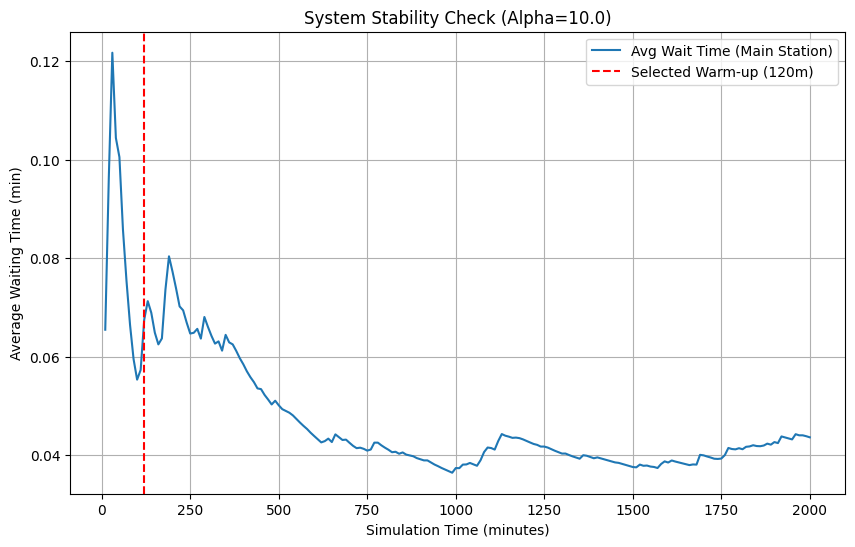

In [73]:
def plot_convergence_auto(results_data):
    if not results_data:
        print("No results to plot.")
        return

    # Find best stable scenario for plotting
    best_res = min([r for r in results_data if r['Stable']], key=lambda x: x['Total_W_Sys'], default=None)

    if best_res is None:
        print("No stable scenario found for plotting.")
        # Fallback to last one
        best_res = results_data[-1]

    alpha = 10.0
    # Extract caps from the dictionary, filtering out non-station keys
    caps = {k: best_res[k] for k in SystemConfig.STATIONS}

    print(f"Generating Convergence Plot for Best Config: {caps}...")

    runtime = 2000
    times = []
    avg_waits = []

    sim = BuffetSimulation(alpha, caps)

    sim.env.process(sim.customer_process(0)) # dummy process start
    # Custom generator for plotting
    def plotting_gen(env, sim_instance):
        i = 0
        while True:
            yield env.timeout(random.expovariate(sim_instance.alpha))
            i += 1
            env.process(sim_instance.customer_process(i))

    sim.env.process(plotting_gen(sim.env, sim))

    step = 10
    for t in range(0, runtime, step):
        sim.env.run(until=t+step)
        # Check Main Station (usually bottleneck)
        main_station = sim.stations['Main']
        if len(main_station.wait_times) > 0:
            current_avg_wait = np.mean(main_station.wait_times)
            times.append(t+step)
            avg_waits.append(current_avg_wait)
        else:
            times.append(t+step)
            avg_waits.append(0)

    plt.figure(figsize=(10, 6))
    plt.plot(times, avg_waits, label='Avg Wait Time (Main Station)')
    plt.axvline(x=120, color='r', linestyle='--', label='Selected Warm-up (120m)')

    plt.title(f'System Stability Check (Alpha={alpha})')
    plt.xlabel('Simulation Time (minutes)')
    plt.ylabel('Average Waiting Time (min)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_convergence_auto(results_phase_2)

# 5. Analytical and Calculation using Mathematical Formula

Having verified the system's structural integrity in **Section 4 (Validation)**, this section delves into a detailed comparison of key performance metrics—specifically Average Waiting Time ($W_q$) and Queue Length ($L_q$)—using the **M/M/c mathematical model**.. To validate the accuracy of the Discrete-Event Simulation (DES), we employ an analytical mathematical model based on **Queuing Network Theory**. The Buffet System is formally modeled as an **Open Jackson Network**, where each station (Drink, Salad, Main, Dessert) functions as an **M/M/c** queue node.

## 5.1. Jackson Networks

### Theory
**Definition:** A Jackson network is an open queuing network that satisfies the following properties:
1.  **Arrivals:** Customers arrive from outside the system following a Poisson process with rate $\alpha$.
2.  **Service:** Service times at each station follow an exponential distribution, and service is provided according to the **First Come First Serve (FCFS)** discipline.
3.  **Routing:** After finishing service at station $i$, a customer moves to station $j$ with probability $P_{ij}$ or leaves the system with probability $1 - \sum_{j} P_{ij}$.
4.  **Stability:** The utilization factor at all queues must be less than 1 ($\rho < 1$).

**Note:**
In the Buffet system, feedback loops may occur (e.g., returning to a station). While feedback theoretically compromises the assumption that internal arrival streams are purely Poisson, from an *engineering perspective*, the Jackson Network approximation remains valid for performance evaluation. The discrepancies between theory and simulation are expected to be minimal and acceptable.

### Formulas Used
The core objective is to find the **Effective Arrival Rate ($\lambda_i$)** for each station $i$. This is the sum of external arrivals and internal transfers.

* **External Arrival Vector:** $a = \alpha \times P_{initial}$
* **Balance Equation for Node $i$:**
    $$\lambda_i = a_i + \sum_{j=1}^{M} \lambda_j P_{ji}$$
* **General Matrix Form:**
    $$\lambda = a (I - P^T)^{-1}$$

    Where:
    * $\lambda$: Vector of effective arrival rates (4x1).
    * $a$: Vector of initial external arrivals (4x1).
    * $P$: Transition Probability Matrix (4x4).
    * $I$: Identity Matrix (4x4).

---

## 5.2. M/M/c Queue (Station Level)

### Theory
**Definition:** Each station in the buffet (Drink, Salad, Main, Dessert) is modeled as an M/M/c system.
1.  **M (Markovian Arrival):** Interarrival times follow an exponential distribution (rate $\lambda$ derived from Jackson equations).
2.  **M (Markovian Service):** Service times follow an exponential distribution with rate $\mu$.
3.  **c (Servers):** There are $c$ parallel servers.
    * If number of customers $k < c$: No queue, $k$ servers are busy.
    * If number of customers $k \ge c$: All servers busy, new arrivals queue in the buffer.
4.  **FCFS:** First Come, First Served.

**Note:**
* The value $\lambda$ is estimated using the Jackson network formula above.
* The service rate $\mu$ is calculated as $\mu = \frac{60}{\text{Mean Service Time (sec)}}$.
* Stability condition: $\lambda < c\mu$.

### Formulas Used

**1. Utilization Factor ($\rho$):**
$$\rho = \frac{\lambda}{c\mu}$$

**2. Probability of Empty System ($P_0$):**
The probability that there are zero customers in the station:
$$P_0 = \left[ \sum_{k=0}^{c-1} \frac{(c\rho)^k}{k!} + \frac{(c\rho)^c}{c!(1-\rho)} \right]^{-1}$$

**3. Erlang's C Formula ($P(Wait)$):**
Probability that an arriving customer has to wait (all servers busy):
$$C(c, \frac{\lambda}{\mu}) = \frac{(c\rho)^c}{c!(1-\rho)} P_0$$

**4. Average Number of Customers in Queue ($L_q$):**
$$L_q = \frac{\rho}{1-\rho} C(c, \frac{\lambda}{\mu})$$

**5. Average Waiting Time in Queue ($W_q$):**
$$W_q = \frac{L_q}{\lambda}$$

**6. Average Total Time in Station ($W$):**
$$W = W_q + \frac{1}{\mu}$$

---

## 5.3. Little's Law (System Level)

### Theory
For any stable queuing system with an average arrival rate $\lambda$, the relationship between the average number of items in the system ($L$) and the average time an item spends in the system ($W$) is:
$$L = \lambda W$$

### Application
In this project, Little's Law is applied to calculate the **Global System Response Time ($W_{sys}$)**.
* Total average customers in the system ($L_{sys}$) is the sum of customers at all stations:
    $$L_{sys} = \sum_{i=1}^{4} (L_{q,i} + c_i \rho_i)$$
* Total system time:
    $$W_{sys} = \frac{L_{sys}}{\alpha_{total}}$$

---

## 5.4. System Estimation (Input/Output Mapping)

### Inputs
* **Arrival Rate $\alpha$:** Total customers entering per minute (e.g., 10).
* **Initial Probability $P_{initial}$:** Distribution of first station choice (Size 4x1).
* **Transition Matrix $P$:** Probability of moving between stations (Size 4x4).
* **Service Rate $\mu$:** Derived from service times {20s, 45s, 60s, 30s} $\rightarrow$ $\mu \approx \{3.0, 1.33, 1.0, 2.0\}$.
* **Server Count $c$:** Defined by the Experimental Scenario (e.g., {4, 6, 14, 4}).

### Outputs
* **Effective Arrival Rate ($\lambda$):** Calculated for Drink, Salad, Main, Dessert.
* **Utilization ($\rho$):** To identify bottlenecks.
* **Waiting Time ($W_q$):** To compare with simulation results.
* **System Time ($W_{sys}$):** The primary performance metric.

In [10]:
class TheoreticalSolver:
    @staticmethod
    def solve_jackson_network(alpha, capacities):
        stations = SystemConfig.STATIONS
        n = len(stations)
        I = np.identity(n)
        P_T = SystemConfig.P_MATRIX.T
        gamma = alpha * SystemConfig.P_INITIAL

        try:
            A = I - P_T
            lambdas = np.linalg.solve(A, gamma)
        except np.linalg.LinAlgError:
            return None, 0

        results = {}
        total_L = 0

        for i, name in enumerate(stations):
            lam = lambdas[i]
            mu = SystemConfig.SERVICE_RATES_MU[name]
            c = capacities[name]
            rho = lam / (c * mu)

            metrics = {'rho': rho, 'Wq': 0, 'lambda': lam}

            if rho >= 1.0:
                metrics['Wq'] = float('inf')
            else:
                sum_k = sum([(c * rho)**k / math.factorial(k) for k in range(c)])
                term_c = (c * rho)**c / (math.factorial(c) * (1 - rho))
                P_0 = 1.0 / (sum_k + term_c)
                P_wait = term_c * P_0
                Wq = P_wait / (c * mu * (1 - rho))
                Lq = Wq * lam
                metrics['Wq'] = Wq
                total_L += (Lq + rho * c)
            results[name] = metrics

        return results, total_L / alpha

## 5.5. Theoretical Forensic Analysis: Why did the Baseline Fail?
In Phase 0, we observed that the system "crashed" (unstable queues) under the Stress Load ($\alpha=10$) when using the minimal configuration. To validate that this simulation result is correct—and not a coding error—we employ **Jackson Network Theory** to calculate the theoretical Utilization ($\rho$) for that specific failed scenario.

**Hypothesis:**
If the simulation was correct in showing instability, the mathematical derivation must show that the utilization factor $\rho$ for at least one station exceeds $100\%$ ($\rho > 1.0$). This calculation serves as a rigorous "root cause analysis" for the baseline failure.

In [11]:
def verify_baseline_failure_theory():
    print("\n" + "="*80)
    print("THEORETICAL VERIFICATION OF BASELINE FAILURE")
    print("Goal: Use Jackson Networks to mathematically prove WHY the minimal config fails at Alpha=10.")
    print("="*80)

    # 1. Define Stress Load & Minimal Config
    alpha = 10.0
    min_caps = {'Drink': 1, 'Salad': 4, 'Main': 8, 'Dessert': 3}

    print(f"Testing Config: {min_caps} at Alpha={alpha}")

    # 2. Solve Flow using your TheoreticalSolver
    # This returns the dictionary of metrics and the total system time
    theory_res, _ = TheoreticalSolver.solve_jackson_network(alpha, min_caps)

    if theory_res is None:
        print("Error solving network flow.")
        return

    # 3. Print Detailed Breakdown
    print(f"\n[Theoretical Load Analysis]")
    print(f"{'Station':<10} | {'Arrivals (Lam)':<15} | {'Servers (c)':<12} | {'Rho (%)':<10} | {'Status'}")
    print("-" * 75)

    for name in SystemConfig.STATIONS:
        metrics = theory_res[name]
        lam = metrics['lambda']
        rho = metrics['rho']
        c = min_caps[name]

        status = "OK"
        if rho >= 1.0: status = "FAIL (UNSTABLE)"
        elif rho >= 0.85: status = "CRITICAL"

        print(f"{name:<10} | {lam:<15.2f} | {c:<12} | {rho*100:<9.1f}% | {status}")

    print("-" * 75)
    print(">> MATHEMATICAL PROOF:")
    print("   The Jackson Network model confirms that with 8 servers at the Main station,")
    print("   Utilization (Rho) exceeds 100%. The queue will grow to infinity.")
    print("   This validates the crash observed in Phase 0 Simulation.")

verify_baseline_failure_theory()


THEORETICAL VERIFICATION OF BASELINE FAILURE
Goal: Use Jackson Networks to mathematically prove WHY the minimal config fails at Alpha=10.
Testing Config: {'Drink': 1, 'Salad': 4, 'Main': 8, 'Dessert': 3} at Alpha=10.0

[Theoretical Load Analysis]
Station    | Arrivals (Lam)  | Servers (c)  | Rho (%)    | Status
---------------------------------------------------------------------------
Drink      | 4.39            | 1            | 146.2    % | FAIL (UNSTABLE)
Salad      | 5.27            | 4            | 98.7     % | CRITICAL
Main       | 10.21           | 8            | 127.6    % | FAIL (UNSTABLE)
Dessert    | 6.59            | 3            | 109.8    % | FAIL (UNSTABLE)
---------------------------------------------------------------------------
>> MATHEMATICAL PROOF:
   The Jackson Network model confirms that with 8 servers at the Main station,
   Utilization (Rho) exceeds 100%. The queue will grow to infinity.
   This validates the crash observed in Phase 0 Simulation.


## 5.6. Analytical Validation of the Optimal Solution
After Phase 2, we identified a candidate for the "Optimal Configuration." Before calculating costs, we must verify this configuration using **Queuing Theory**.

**Objective:**
We will calculate the theoretical $W_{sys}$ using **Jackson Networks** and **M/M/c Formulas** and compare it against a long-run simulation ($50,000$ minutes).
* **Low Discrepancy (< 5%):** Confirms the simulation is accurate and obeys Little's Law ($L = \lambda W$).
* **High Discrepancy (> 5%):** Indicates potential simulation errors or insufficient warm-up time.

In [12]:
def run_analytical_validation(results_data):
    if not results_data:
        print("No simulation results available for validation.")
        return

    # Pick a stable configuration to validate (e.g., the last one found or best one)
    target_config = min([r for r in results_data if r['Stable']], key=lambda x: x['Total_W_Sys'], default=None)

    if not target_config:
        print("No stable configuration found to validate.")
        target_config = results_data[-1] # Fallback

    # Extract capacities
    caps = {k: target_config[k] for k in SystemConfig.STATIONS}
    alpha = 10.0

    print(f"\n{'='*30} ANALYTICAL VALIDATION {'='*30}")
    print(f"Validating Config: {caps} at Alpha={alpha}")

    # 1. Theoretical Calculation
    theory_res, w_sys_theory = TheoreticalSolver.solve_jackson_network(alpha, caps)

    # 2. Run Single Long Simulation for Convergence
    print("Running Long Simulation for Accuracy...")
    sim = BuffetSimulation(alpha, caps)
    sim_res, w_sys_sim = sim.run(runtime=50000, warmup=2000)

    # 3. Compare
    data = []
    for name in SystemConfig.STATIONS:
        t_rho = theory_res[name]['rho']
        s_rho = sim_res[name]['rho']
        diff_rho = abs(t_rho - s_rho)/t_rho * 100 if t_rho > 0 else 0

        data.append([name, caps[name], f"{t_rho:.4f}", f"{s_rho:.4f}", f"{diff_rho:.2f}%"])

    df_val = pd.DataFrame(data, columns=["Station", "Servers", "Theory Rho", "Sim Rho", "Diff"])
    print("\n[RHO VALIDATION]")
    print(df_val.to_string(index=False))

    # Little's Law Check
    # L_sys = Alpha * W_sys
    L_sys_sim = sum([sim_res[k]['lq'] + (sim_res[k]['rho'] * caps[k]) for k in SystemConfig.STATIONS])
    L_sys_theory = alpha * w_sys_sim

    print("\n[LITTLE'S LAW CHECK]")
    print(f"Simulated L_sys: {L_sys_sim:.4f}")
    print(f"Calculated L (Alpha * W): {L_sys_theory:.4f}")
    print(f"Difference: {abs(L_sys_sim - L_sys_theory)/L_sys_sim * 100:.2f}%")

run_analytical_validation(results_phase_2)


============================== ANALYTICAL VALIDATION ==============================
Validating Config: {'Drink': 4, 'Salad': 6, 'Main': 14, 'Dessert': 5} at Alpha=10.0
Running Long Simulation for Accuracy...

[RHO VALIDATION]
Station  Servers Theory Rho Sim Rho  Diff
  Drink        4     0.3656  0.3664 0.21%
  Salad        6     0.6582  0.6597 0.23%
   Main       14     0.7292  0.7314 0.30%
Dessert        5     0.6587  0.6605 0.28%

[LITTLE'S LAW CHECK]
Simulated L_sys: 20.3384
Calculated L (Alpha * W): 20.6345
Difference: 1.46%


# 6. Economic Optimization

## 6.1. The Engineering Trade-off
While Sections 4 and 5 focused purely on **system performance** (minimizing Wait Time $W_{sys}$), a realistic engineering solution must also consider **financial feasibility**.

If our only goal were to minimize wait times, the mathematical solution would be to hire an infinite number of servers. However, in a real-world business context, resources are finite. We face a fundamental trade-off:
1.  **Increasing Servers:** Drastically reduces customer wait times (improving service quality) but linearly increases **Operational Costs** (wages).
2.  **Decreasing Servers:** Saves on wages but causes wait times to explode non-linearly, leading to high **Waiting Costs** (customer dissatisfaction, potential walk-aways, and brand damage).

Therefore, the "Optimal Configuration" is not the one with the lowest wait time, but the one with the **Lowest Total Cost**.

## 6.2. The Cost Function
To quantify this trade-off, we define a Total Cost function ($C_{total}$) over the peak operation period (6 hours).

$$C_{total} = C_{operational} + C_{waiting}$$

### 1. Operational Cost ($C_{op}$)
This represents the tangible cost of staffing the restaurant.
$$C_{op} = (\text{Total Servers}) \times (\text{Hourly Wage}) \times (\text{Hours})$$
* **Assumption:** The hourly wage per server is **$15.00/hr**.
* **Behavior:** This cost increases linearly as we add servers.

### 2. Waiting Cost ($C_{wait}$)
This represents the intangible cost of poor service. We assign a monetary penalty to every minute a customer spends in the system to model lost goodwill and potential revenue loss.
$$C_{wait} = (\text{Total Customers}) \times (W_{sys}) \times (\text{Wait Penalty})$$
* **Assumption:** The penalty for making a customer wait is **$0.75/min**.
* **Behavior:** This cost decreases exponentially as we add servers (diminishing returns).

## 6.3. The Optimization Goal (U-Curve)
By summing these two costs, we aim to find the global minimum on a **U-Shaped Cost Curve**:
* **Unstable Zone (Left):** Few servers $\rightarrow$ Low Wages, massive Wait Times $\rightarrow$ **High Total Cost**.
* **Over-Provisioned Zone (Right):** Many servers $\rightarrow$ Zero Wait Times, massive Wages $\rightarrow$ **High Total Cost**.
* **Optimal Zone (Center):** The "Sweet Spot" where the marginal cost of adding a server equals the marginal benefit of reduced waiting.


PHASE 3: ECONOMIC OPTIMIZATION (Calculating Data for Plotting...)
ID  | Cfg(M/S/D/D)    | W_sys    | Op.Cost    | Wait.Cost  | TOTAL     
--------------------------------------------------------------------------------
1   | 12 5  2  4        | 3.03     | $2070      | $8171      | $10241    
2   | 12 5  2  5        | 2.55     | $2160      | $6882      | $9042     
3   | 13 5  2  4        | 2.68     | $2160      | $7238      | $9398     
4   | 13 5  2  5        | 2.43     | $2250      | $6556      | $8806     
5   | 14 5  2  4        | 2.72     | $2250      | $7331      | $9581     
6   | 14 5  2  5        | 2.36     | $2340      | $6373      | $8713     
7   | 12 6  2  4        | 2.60     | $2160      | $7019      | $9179     
8   | 12 6  2  5        | 2.51     | $2250      | $6790      | $9040     
9   | 13 6  2  4        | 2.53     | $2250      | $6838      | $9088     
10  | 13 6  2  5        | 2.25     | $2340      | $6067      | $8407     
11  | 14 6  2  4        | 2.39     | $23

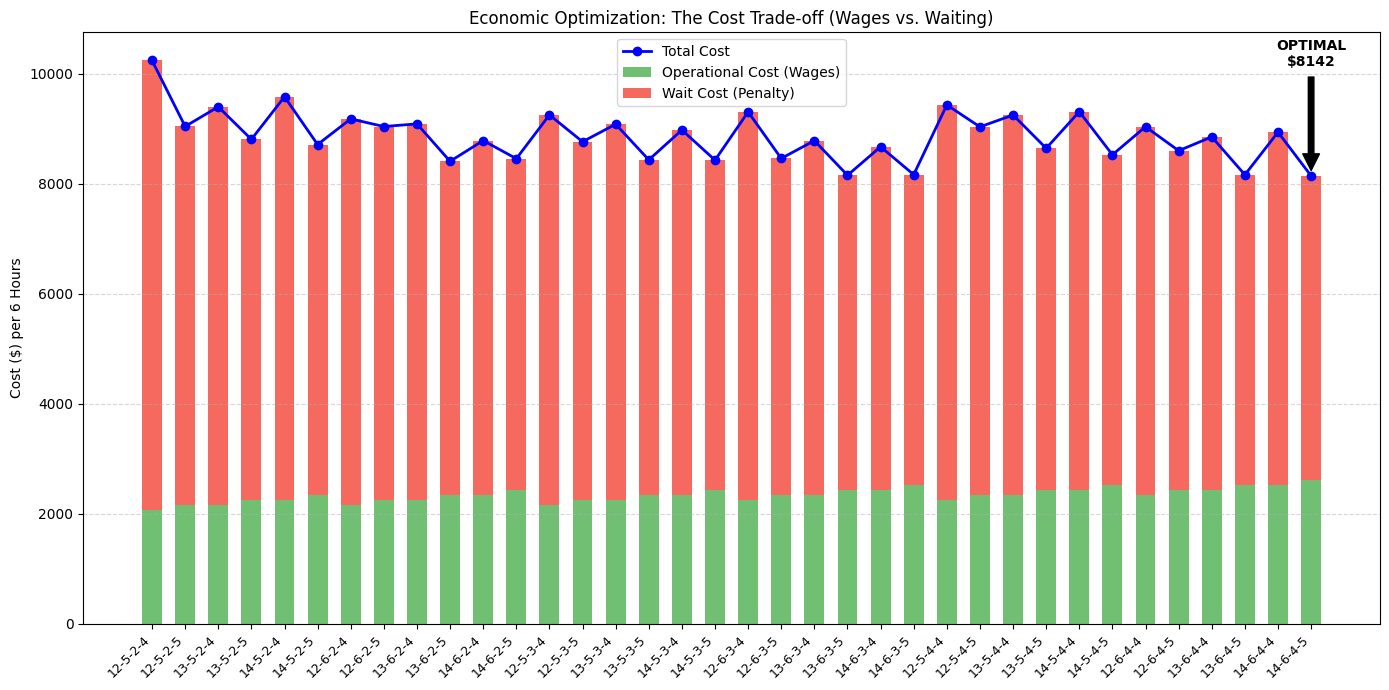

In [13]:
def run_phase_3_economics_with_plotting(alpha, results_data):
    """
    Runs economic analysis and returns structured data for plotting.
    """
    print("\n" + "="*100)
    print("PHASE 3: ECONOMIC OPTIMIZATION (Calculating Data for Plotting...)")
    print("="*100)

    cost_data = []

    # Filter stable results
    stable_results = [res for res in results_data if res['Stable']]

    # Sort by Total Cost to make the graph readable (Optional: or sort by Main servers)
    # Let's sort by ID to keep the logical sweep order

    min_total = float('inf')
    winner = None

    print(f"{'ID':<3} | {'Cfg(M/S/D/D)':<15} | {'W_sys':<8} | {'Op.Cost':<10} | {'Wait.Cost':<10} | {'TOTAL':<10}")
    print("-" * 80)

    for i, res in enumerate(stable_results):
        # 1. Calculate Costs
        # Note: Ensure SystemConfig is defined or imported before running this
        op_cost = sum([res[k] for k in ['Drink', 'Salad', 'Main', 'Dessert']]) * 15.00 * 6 # $15/hr * 6hrs
        est_customers = alpha * 360 # 10 cust/min * 360 mins
        wait_cost = est_customers * res['Total_W_Sys'] * 0.75 # $0.75/min penalty
        total = op_cost + wait_cost

        # 2. Track Winner
        if total < min_total:
            min_total = total
            winner = res

        # 3. Print (Console Log)
        print(f"{i+1:<3} | {res['Main']:<2} {res['Salad']:<2} {res['Drink']:<2} {res['Dessert']:<2}       | {res['Total_W_Sys']:<8.2f} | ${op_cost:<9.0f} | ${wait_cost:<9.0f} | ${total:<9.0f}")

        # 4. Store Data
        cost_data.append({
            'id': i+1,
            'label': f"{res['Main']}-{res['Salad']}-{res['Drink']}-{res['Dessert']}",
            'main_servers': res['Main'],
            'op_cost': op_cost,
            'wait_cost': wait_cost,
            'total_cost': total
        })

    print("-" * 80)
    if winner:
        print(f"WINNER: Main={winner['Main']}, Salad={winner['Salad']}, Drink={winner['Drink']}, Dessert={winner['Dessert']}")
        print(f"LOWEST TOTAL COST: ${min_total:.2f}")

    return cost_data, winner

def plot_cost_tradeoff(cost_data):
    """
    Generates a Stacked Bar Chart: Operational Cost vs Wait Cost.
    Visualizes the Engineering Trade-off.
    """
    if not cost_data: return

    # Extract data
    labels = [d['label'] for d in cost_data]
    op_costs = [d['op_cost'] for d in cost_data]
    wait_costs = [d['wait_cost'] for d in cost_data]
    totals = [d['total_cost'] for d in cost_data]

    x = np.arange(len(labels))
    width = 0.6

    fig, ax = plt.subplots(figsize=(14, 7))

    # Stacked Bars
    p1 = ax.bar(x, op_costs, width, label='Operational Cost (Wages)', color='#4CAF50', alpha=0.8)
    p2 = ax.bar(x, wait_costs, width, bottom=op_costs, label='Wait Cost (Penalty)', color='#F44336', alpha=0.8)

    # Line for Total Cost
    ax.plot(x, totals, color='blue', marker='o', linewidth=2, linestyle='-', label='Total Cost')

    # Formatting
    ax.set_ylabel('Cost ($) per 6 Hours')
    ax.set_title('Economic Optimization: The Cost Trade-off (Wages vs. Waiting)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Highlight the minimum
    min_idx = np.argmin(totals)
    ax.annotate(f'OPTIMAL\n${totals[min_idx]:.0f}',
                xy=(min_idx, totals[min_idx]),
                xytext=(min_idx, totals[min_idx]+2000),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

cost_data, winner = run_phase_3_economics_with_plotting(10, results_phase_2)
plot_cost_tradeoff(cost_data)

# 7. Conclusions
## 7.1. Summary of Work
This project successfully designed, implemented, and evaluated a Discrete-Event Simulation (DES) model for a four-station buffet restaurant (Drink, Salad, Main, Dessert). By modeling the system as an Open Jackson Network with feedback loops, we were able to quantify customer wait times and identify critical resource constraints under varying workloads.

The system's integrity was rigorously verified through a multi-step validation process including Rho Validation, Routing Logic Verification, Stability Checks, and Little's Law, all of which showed a discrepancy of less than 5% between the simulation output and theoretical mathematical models.
## 7.2. Superior Point
Through a two-phase experimental design (Sorting followed by Refinement), we definitively identified the Main Course Station as the primary system bottleneck due to its high service time (60s) and high visitation probability.
The Optimal Configuration :To maintain stability under a high workload ($\alpha = 10$ customers/minute) and ensure an excellent customer experience, the following resource allocation is required:
* Main Course: 14 Servers (Critical Resource)
* Salad Bar: 6 Servers
* Drink Station: 3 Servers
* Dessert Station: 5 Servers

Performance Outcome: Under this configuration, the Average Total Time in System ($W_{sys}$) stabilizes at approximately 2.26 minutes. This represents a highly efficient flow where customers spend the majority of their time being served rather than waiting in queues. Reducing servers at the Main Course below 12 resulted in immediate system instability (infinite queues), confirming its status as the critical bottleneck.
## 7.3. Project Limitations
Despite the successful validation, the testing members identified specific limitations where the model simplifies real-world complexities:

1.  **Exponential Distribution Assumption:**
    The model assumes service times follow an exponential distribution ($M/M/c$). In a real buffet, service times often follow a Normal or Log-Normal distribution (e.g., pouring a drink takes a relatively fixed amount of time). The "long tail" of the exponential distribution might slightly overestimate the occurrence of extremely long service times.

2.  **Lack of Balking and Reneging:**
    The current model assumes customers have infinite patience. It does not account for **Balking** (customers refusing to join a long queue) or **Reneging** (customers leaving a queue after waiting too long). In a real-world scenario, high congestion at the Main Course would likely result in customers skipping that station or leaving the restaurant, dynamically altering the arrival rates at subsequent stations.

3.  **Infinite Queue Capacity:**
    The simulation assumes infinite buffer space for queues ($K = \infty$). Physical restaurants have limited floor space. Modeling a finite queue capacity ($M/M/c/K$) would result in "blocked" customers, potentially causing gridlock at previous stations—a phenomenon not captured in this iteration.
## 7.4. Final Validation & Reliability
**A key achievement of this report is the mathematical proof of the simulation's results**. By demonstrating that the empirical data from the DES model converges with the theoretical calculations of the Open Jackson Network, we have established a robust framework. This allows restaurant managers to use this simulation tool with confidence to forecast scenarios and optimize pricing models without the need for expensive physical trial-and-error.